In [ ]:
# Debug
!pip install -Uqq ipdb
import ipdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


In [ ]:
## Encender y apagar el debugger
%pdb off
## Para agregar un breakpoint
# ipdb.set_trace()

Automatic pdb calling has been turned OFF


In [ ]:
!wget -nc https://raw.githubusercontent.com/Jegovila/SSPIA1/main/3%20Algoritmos%20Gen%C3%A9ticos/C%C3%B3digos/Plot_Surf.py
!wget -nc https://raw.githubusercontent.com/Jegovila/SSPIA1/main/3%20Algoritmos%20Gen%C3%A9ticos/C%C3%B3digos/Plot_Contour.py

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

--2023-09-15 04:41:54--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/3%20Algoritmos%20Gen%C3%A9ticos/C%C3%B3digos/Plot_Surf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611 [text/plain]
Saving to: ‘Plot_Surf.py’

Plot_Surf.py        100%[===================>]     611  --.-KB/s    in 0s      

2023-09-15 04:41:55 (36.9 MB/s) - ‘Plot_Surf.py’ saved [611/611]

--2023-09-15 04:41:55--  https://raw.githubusercontent.com/Jegovila/SSPIA1/main/3%20Algoritmos%20Gen%C3%A9ticos/C%C3%B3digos/Plot_Contour.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiti

# Parámetros

# Funciones

## Selección

In [ ]:
def Seleccion(aptitud):

    # Solo elegir una de estas dos variantes
    torneo = True
    rank = False

    if torneo:
      N = (aptitud.size)
      tao = int(np.round(N * 0.3))

      I = np.random.randint(0, N, tao)
      idx = np.argmax(aptitud[I])
      n = I[idx]
      return n
    elif rank:
      Idx = np.argsort(aptitud)
      Idx = Idx[::-1]
      N = (aptitud.size)

      rank = np.arange(N,-1,-1)
      rank_total = np.sum(rank)

      r = np.random.rand()
      p_sum = 0

      for i in range(N):
        p_sum = p_sum + rank[i] / rank_total

        if p_sum >= r:
            n = Idx[i]
            return n

      n = N
      return n

    # Selección sin variantes
    aptitud_total = np.sum(aptitud)
    N = (aptitud.size)

    r = np.random.rand()
    p_sum = 0

    for i in range(N):
        p_sum = p_sum + aptitud[i] / aptitud_total

        if p_sum >= r:
            n = i
            return n

    n = N
    return n


## Cruza

In [ ]:
def Cruza(x1, x2):

  aritmetica = True
  if aritmetica:
    alpha = np.random.random()
    y1 = alpha * x1 + (1-alpha)*x2
    y2 = (1-alpha) * x1 + (alpha)*x2
    return y1, y2


  D = x1.size
  pc = np.random.randint(0, D)

  y1 = x1.copy()
  y2 = x2.copy()

  y1[pc:] = x2[pc:]
  y2[pc:] = x1[pc:]

  return y1, y2

## Mutación

In [ ]:
def Mutacion(y, pm, x=None, xu=None):
  normal = False

  D, N = y.shape

  for i in range(N):
      for j in range(D):
          if np.random.rand() < pm:
            if normal or algoritmo == 'elitism':
              y[j,i] = y[j,i] + np.random.normal(0, 1)
            else:
              y[j,i] = xl[j] + (xu[j] - xl[j]) * np.random.rand()
  return y

PARAMETROS EJERCICIOS

In [ ]:
f = lambda x, y: ((x - 2)**2) + ((y - 2)**2)

xl = np.array([-3, -3])
xu = np.array([3, 3])

N = 80 # Población, debe ser par
E = 10
D = 2
G = 100
pm = 0.01

In [ ]:
f = lambda x, y: x * np.exp(-x**2 - y**2)

xl = np.array([-2, -2])
xu = np.array([2, 2])

N = 80 # Población, debe ser par
E = 10
D = 2
G = 100
pm = 0.01

# Algoritmos Genéticos

Elegir el algoritmo genético

In [ ]:
algoritmo = 'ga'        # Clásico
#algoritmo = 'elitism'  # Elitista

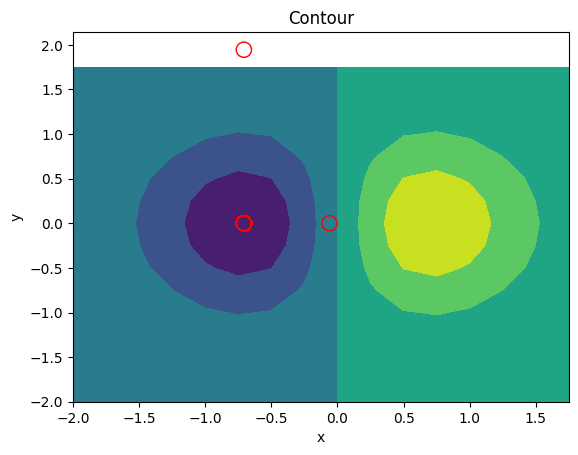

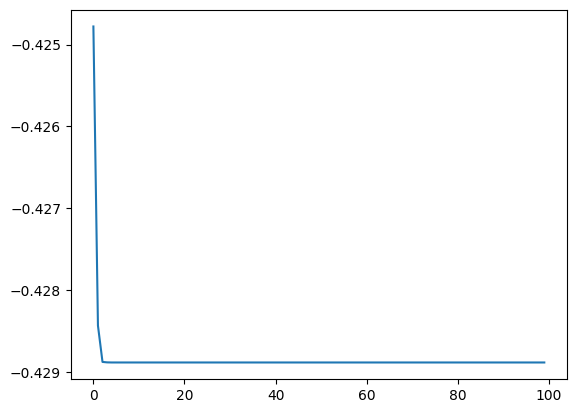

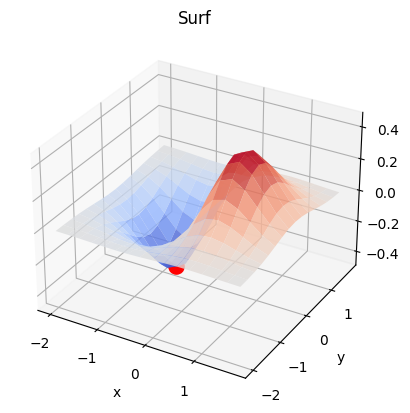

Mínimo global en x= -0.7072771656944701  y= 0.0006368816208236907  f(x,y)= -0.42888174361843734


In [ ]:
x = np.zeros((D,N))
aptitud = np.zeros(N)
f_plot = np.zeros(G) # Grafica Convergencia

for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)

for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        fx = f(x[0, i], x[1, i])

        if fx >= 0:
            aptitud[i] = 1 / (1 + fx)
        else:
            aptitud[i] = 1 + np.abs(fx)

        # Grafica Convergencia
        i_mejor = np.argmax(aptitud)
        xb = x[:, i_mejor]
        fxb = f(xb[0],xb[1])
        f_plot[g] = fxb

    if algoritmo == 'ga':
      y = np.zeros((D, N))
      endloop = N
    elif algoritmo == 'elitism':
      y = np.zeros((D, N-E))
      endloop = N-E

    for i in range(0, endloop, 2):
        r1 = Seleccion(aptitud)
        r2 = r1
        # Dos padres generan dos hijos
        # El mismo padre puede tomar diferentes parejas
        # pero para cada cruza deben ser dos padres diferentes
        # De lo contrario, en la cruza saldrían padres = hijos
        while r2 == r1:
            r2 = Seleccion(aptitud)

        y1, y2 = Cruza(x[:, r1], x[:, r2])

        y[:, i] = y1
        y[:, i+1] = y2

    y = Mutacion(y, pm, xl, xu)

    if algoritmo == 'ga':
      x = y.copy()
    elif algoritmo == 'elitism':
      Idx = np.argsort(aptitud)
      Idx = Idx[::-1]
      x = np.concatenate((y,x[:, Idx[0:E]]),axis=1)

for i in range(N):
    fx = f(x[0, i], x[1, i])
    if fx >= 0:
        aptitud[i] = 1 / (1 + fx)
    else:
        aptitud[i] = 1 + abs(fx)


plt.plot(range(G), f_plot)
i_mejor = np.argmax(aptitud)
plot_surf(f, x, xl, xu, i_mejor)

print("Mínimo global en x=", x[0,i_mejor], " y=", x[1,i_mejor], " f(x,y)=", f(x[0,i_mejor], x[1,i_mejor]))